In [32]:
import matplotlib.pyplot as plt
import numpy as np
from metamod.tasks import MNIST
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
plt.rcParams['text.usetex'] = True

In [25]:
best_possible_loss = np.zeros((10, 10))

In [31]:
for i in range(10):
    for j in range(10):
        print(i, j)
        dataset_params = {"batch_size": 256,
                  "new_shape": (5, 5),
                  "subset": (i, j)}
        dataset = MNIST(**dataset_params)
        best_possible_loss[i, j] =  dataset.get_best_possible_error()

0 0


/home/rodrigo/anaconda3/envs/metamod/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/rodrigo/anaconda3/envs/metamod/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/rodrigo/anaconda3/envs/metamod/lib/python3.10/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/rodrigo/anaconda3/envs/metamod/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


KeyboardInterrupt: 

In [17]:
import pickle
pickle.dump(best_possible_loss, open("best_errors.pkl", "wb"), protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
import pandas as pd
best_possible_loss = pd.read_pickle("best_errors.pkl")

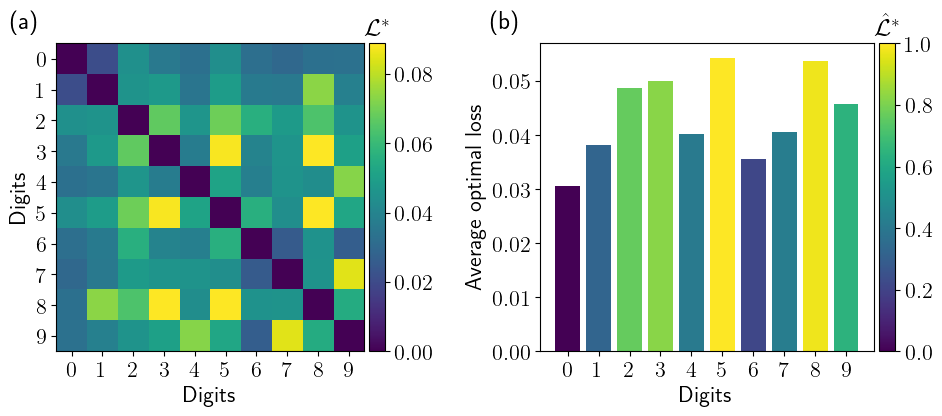

In [51]:
f, ax = plt.subplots(1, 2, figsize=(11, 4))
im = ax[0].imshow(best_possible_loss, interpolation=None)
ax[0].set_xticks(np.arange(10))
ax[0].set_yticks(np.arange(10))
ax[0].tick_params(axis='both', which='major', labelsize=16)
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_title(r"$\mathcal{L}^{*}$", fontsize=18)
cbar.ax.tick_params(labelsize=16)
ax[0].text(-0.15, 1.05, "(a)", transform=ax[0].transAxes,
         size=18, weight='bold')
ax[0].set_xlabel("Digits", fontsize=16)
ax[0].set_ylabel("Digits", fontsize=16)
f.subplots_adjust(wspace=0.4)

difficulty_per_digit = np.mean(best_possible_loss, axis=1)
normalized_diff = (difficulty_per_digit - np.amin(difficulty_per_digit))/np.amax(difficulty_per_digit - np.amin(difficulty_per_digit))
colors = cm.viridis(normalized_diff)
bars = ax[1].bar(np.arange(10), np.mean(best_possible_loss, axis=1), color=colors)
sm = ScalarMappable(cmap=cm.viridis, norm=plt.Normalize(0,max(normalized_diff)))
sm.set_array([])

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(sm, cax = cax)
cbar.ax.set_title(r"$\hat{\mathcal{L}}^{*}$", fontsize=18)
cbar.ax.tick_params(labelsize=16)


ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_xticks(np.arange(10))
ax[1].set_ylabel("Average optimal loss", fontsize=16)
ax[1].set_xlabel("Digits", fontsize=16)
ax[1].text(-0.15, 1.05, "(b)", transform=ax[1].transAxes,
         size=18, weight='bold')

plt.savefig("paper_figures/task_difficulty.pdf", bbox_inches="tight")

plt.show()

In [5]:
print(best_possible_loss[0, 1], best_possible_loss[7, 1], best_possible_loss[8, 9])

0.020885764312144894 0.03583208179539821 0.05469398969183792


In [6]:
difficulty_per_digit = np.mean(best_possible_loss, axis=1)

In [7]:
np.argsort(difficulty_per_digit)

array([0, 6, 1, 4, 7, 9, 2, 3, 8, 5])